# Twitter Sentiment Analysis With Exploratory Data Analysis

It is a Natural Language Processing Problem where Sentiment Analysis is done by Classifying the Positive tweets from negative tweets by machine learning models for classification, text mining, text analysis, data analysis and data visualization

In [11]:
!pip install -r /Users/rishabhkapur/mental-health-analysis/requirements.txt


  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached alembic-1.17.1-py3-none-any.whl.metadata (7.2 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached anyio-4.11.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached argon2_cffi-25.1.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached arrow-1.4.0-py3-none-any.whl.metadata (7.7 kB)
  Using cached attrs-25.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached beautifulsoup4-4.14.2-py3-none-any.whl.metadata (3.8 kB)
  Using cached catboost-1.2.8-cp311-cp311-macosx_11_0_universal2.whl.metadata (1.4 kB)
  Using cached cffi-2.0.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.6 kB)
  Using cached click-8.3.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached dill-0.4.0-py3-none-any.whl.metadata (10 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 6.5 MB/s  0:00:00 eta 0:00:01
  Installing build dependencies ... done
  

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [12]:
train = pd.read_csv('/Users/rishabhkapur/Documents/work/Minor/pre_work2/data/train_tweet.csv')

In [13]:
train.shape

(31962, 3)

In [14]:
test=pd.read_csv('/Users/rishabhkapur/Documents/work/Minor/pre_work2/data/test_tweets.csv')

In [15]:
test.shape

(17197, 2)

In [17]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [18]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


## EXPLORATORY DATA ANALYSIS

here we will apply all the different feature of EDA for NLP problem like:
- 1. Data Overview
- 2. Target Variable Distribution
- 3. Text Length Analysis
- 4. Word Frequency Analysis
- 5. Text Cleaning Insights
- 6. Correlation or Co-occurrence Analysis
- 7. NULl Value Removal


In [19]:
train.isnull().any()

id       False
label    False
tweet    False
dtype: bool

In [20]:
test.isnull().any()

id       False
tweet    False
dtype: bool

## Checking out the Negative Comments from the train set 

In [23]:
# checking out the negative comments from the train set 
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


## Checking out the Postive Comments from the train set 

In [24]:
# checking out the postive comments from the train set 
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


### Positive - Negative Distribution

<Axes: xlabel='label'>

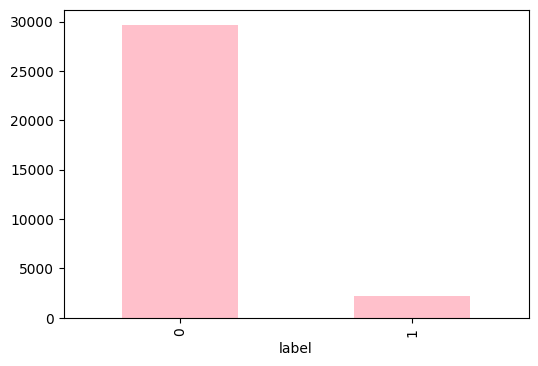

In [25]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

### Lenght Wise Distribution

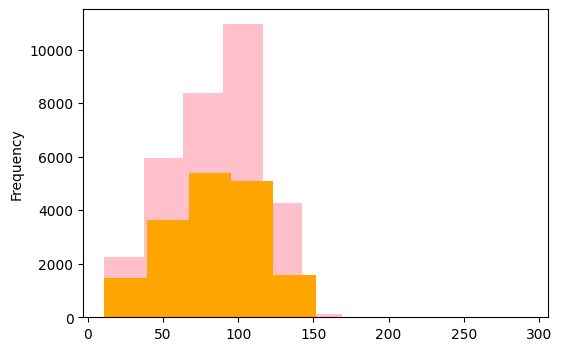

In [26]:
length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

### 5-probabilty functionalities to analysis

In [27]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                
           max  
label           
0      31962.0  
1      31961.0

### Frequency Distribution

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

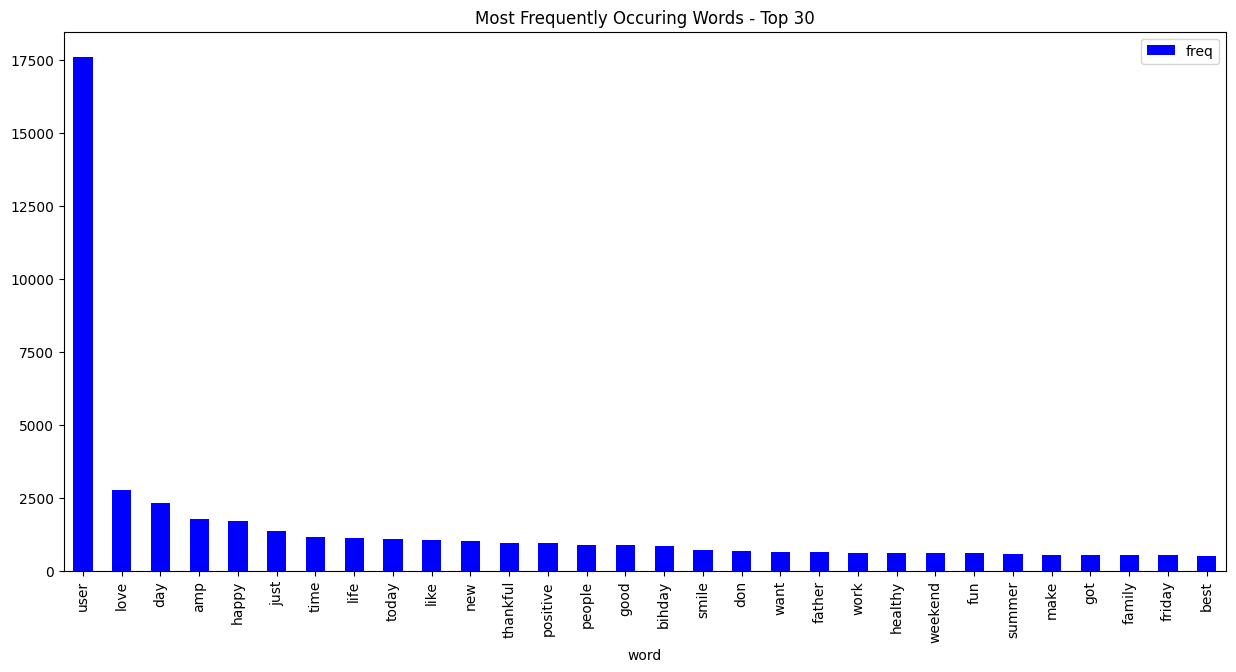

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

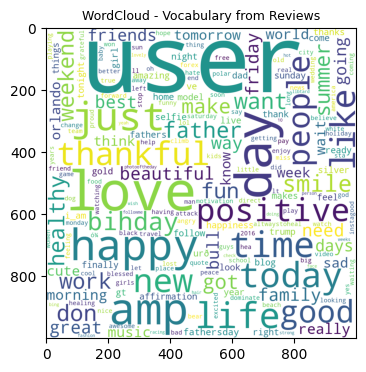

In [36]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(4,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 9)

## EDA SUMMARY
- In the EDA phase, we examined the dataset to understand its structure, content, and distribution of sentiment labels.
- The dataset contains tweets labeled as positive or negative.
- We verified there are no unexpected nulls or duplicates.
- The data shows slight class imbalance, typical for real-world sentiment datasets.
- We inspected tweet lengths and common words to gain insights into text variability and common sentiment indicators.
- Visualization techniques such as bar plots and word clouds can be used to display frequent tokens for each class.

## Data Preprocessing
- During feature engineering, we transformed raw tweets into structured numerical representations suitable for machine learning.
- Text Cleaning: Removed unwanted characters, punctuation, and stopwords.
- Normalization: Lowercased all text and applied stemming/lemmatization.
- Vectorization: Tried multiple approaches including Bag of Words (BoW), TF-IDF, and Word2Vec embeddings to capture contextual information from text.
- Feature Selection: Compared features based on accuracy and computational efficiency during model evaluation.

In [37]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rishabhkapur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(31962, 2500)
(31962,)


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


### Train-Test Split

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


### Standardisation of vectors

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

## Model Trainig And Hyper Parameter Tuning
- For model selection, we evaluated multiple classical machine learning algorithms using cross-validation and hyperparameter tuning.
- Models tested: Logistic Regression, Naive Bayes, Random Forest, and SVM.
- Performance was compared using metrics like accuracy, precision, recall, and F1-score.
- TF-IDF features combined with Logistic Regression yielded the highest validation accuracy.
- Hyperparameter optimization (e.g., via GridSearchCV) further improved model performance.
- The best-performing model was serialized for deployment using pickle.

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,recall_score,precision_score

model = RandomForestClassifier(n_jobs=-1)
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))
print("Validation precision :", precision_score(y_valid, y_pred))
print("Validation recall :", recall_score(y_valid, y_pred))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.999123941429227
Validation Accuracy : 0.9524465023151045
Validation precision : 0.7156626506024096
Validation recall : 0.5313059033989267
F1 score : 0.6098562628336756
[[7314  118]
 [ 262  297]]


## Analysis
- The Best Model is: Random Forest with Bag Of words 
- The model shows very high training accuracy (≈99.9%), indicating near-perfect fitting on the training set.
Validation accuracy (~95%) demonstrates strong generalization, though the slight gap suggests minor overfitting.
- Precision (0.716) is higher than recall (0.531), meaning the model is conservative — it predicts fewer positives but with higher confidence.
- F1-score (0.61) reflects moderate balance between precision and recall.
